<a href="https://colab.research.google.com/github/sashachereshnya-pixel/compling2025/blob/main/%D0%94%D0%97_%D0%A7%D0%95%D0%A0%D0%95%D0%92%D0%98%D0%9A_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bag-of-Words

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 50.5 MB/s eta 0:00:00


In [ ]:
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint

In [ ]:
# Данные для примера
documents = [
    "кошка сидит на ковре",
    "собака бегает по двору",
    "кошка играет с собакой",
    "птица летит высоко в небе",
    "собака и кошка дружат"
]

print("Исходные документы:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

Исходные документы:
1. кошка сидит на ковре
2. собака бегает по двору
3. кошка играет с собакой
4. птица летит высоко в небе
5. собака и кошка дружат


In [ ]:
# Токенизация
tokenized_docs = [doc.lower().split() for doc in documents]
print("Токенизированные документы:")
pprint(tokenized_docs)

Токенизированные документы:
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]


In [ ]:
# Создание словаря
dictionary = corpora.Dictionary(tokenized_docs)
print(f"Словарь: {dictionary.token2id}")

Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}


In [ ]:
dictionary.token2id

{'ковре': 0,
 'кошка': 1,
 'на': 2,
 'сидит': 3,
 'бегает': 4,
 'двору': 5,
 'по': 6,
 'собака': 7,
 'играет': 8,
 'с': 9,
 'собакой': 10,
 'в': 11,
 'высоко': 12,
 'летит': 13,
 'небе': 14,
 'птица': 15,
 'дружат': 16,
 'и': 17}

In [ ]:
# Создание Bag-of-Words представления
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print("Bag-of-Words векторы (индекс_слова: частота):")
for i, doc_vec in enumerate(bow_corpus, 1):
    print(f"Документ {i}: {doc_vec}")

Bag-of-Words векторы (индекс_слова: частота):
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]


```
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]
 ```

```
Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}
```

In [ ]:
# Преобразование в плотные векторы для визуализации
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)
print("Плотные векторы Bag-of-Words:")
print("Слова:", list(dictionary.token2id.keys()))
for i, vec in enumerate(dense_vectors, 1):
    print(f"Док {i}: {vec}")

Плотные векторы Bag-of-Words:
Слова: ['ковре', 'кошка', 'на', 'сидит', 'бегает', 'двору', 'по', 'собака', 'играет', 'с', 'собакой', 'в', 'высоко', 'летит', 'небе', 'птица', 'дружат', 'и']
Док 1: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 2: [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 3: [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Док 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
Док 5: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


```
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]
```

Matrix shape: (5, 18)


Text(0.5, 36.72222222222221, 'Words')

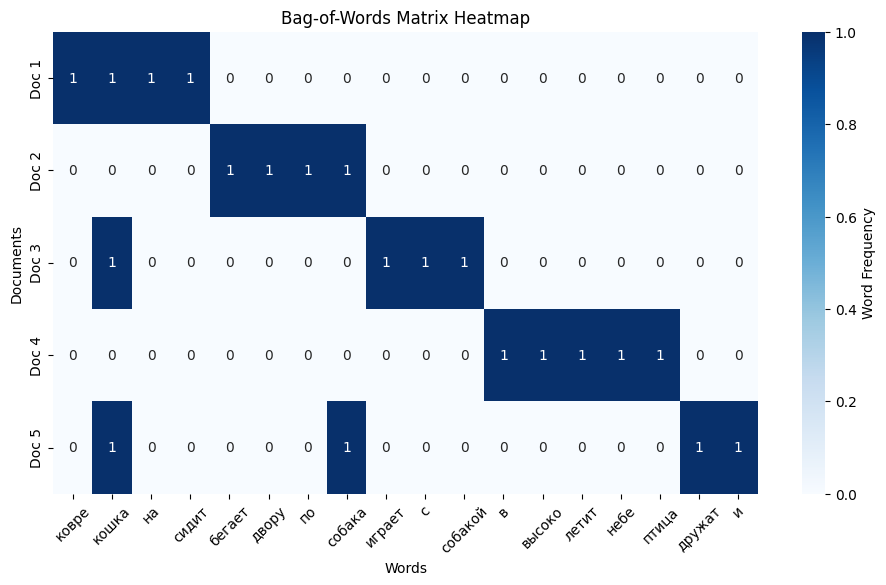

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация
matrix = np.array(dense_vectors)
words = list(dictionary.token2id.keys())
doc_names = [f"Doc {i+1}" for i in range(len(documents))]

print(f"Matrix shape: {matrix.shape}")

plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap')
plt.xticks(rotation=45)
plt.ylabel('Documents')
plt.xlabel('Words')


### TF-IDF

In [ ]:
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF векторы (индекс_слова: tfidf_вес):")
for i, doc_vec in enumerate(tfidf_corpus, 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc_vec]}")

TF-IDF векторы (индекс_слова: tfidf_вес):
Документ 1: [('ковре', np.float64(0.568)), ('кошка', np.float64(0.18)), ('на', np.float64(0.568)), ('сидит', np.float64(0.568))]
Документ 2: [('бегает', np.float64(0.548)), ('двору', np.float64(0.548)), ('по', np.float64(0.548)), ('собака', np.float64(0.312))]
Документ 3: [('кошка', np.float64(0.18)), ('играет', np.float64(0.568)), ('с', np.float64(0.568)), ('собакой', np.float64(0.568))]
Документ 4: [('в', np.float64(0.447)), ('высоко', np.float64(0.447)), ('летит', np.float64(0.447)), ('небе', np.float64(0.447)), ('птица', np.float64(0.447))]
Документ 5: [('кошка', np.float64(0.204)), ('собака', np.float64(0.366)), ('дружат', np.float64(0.642)), ('и', np.float64(0.642))]


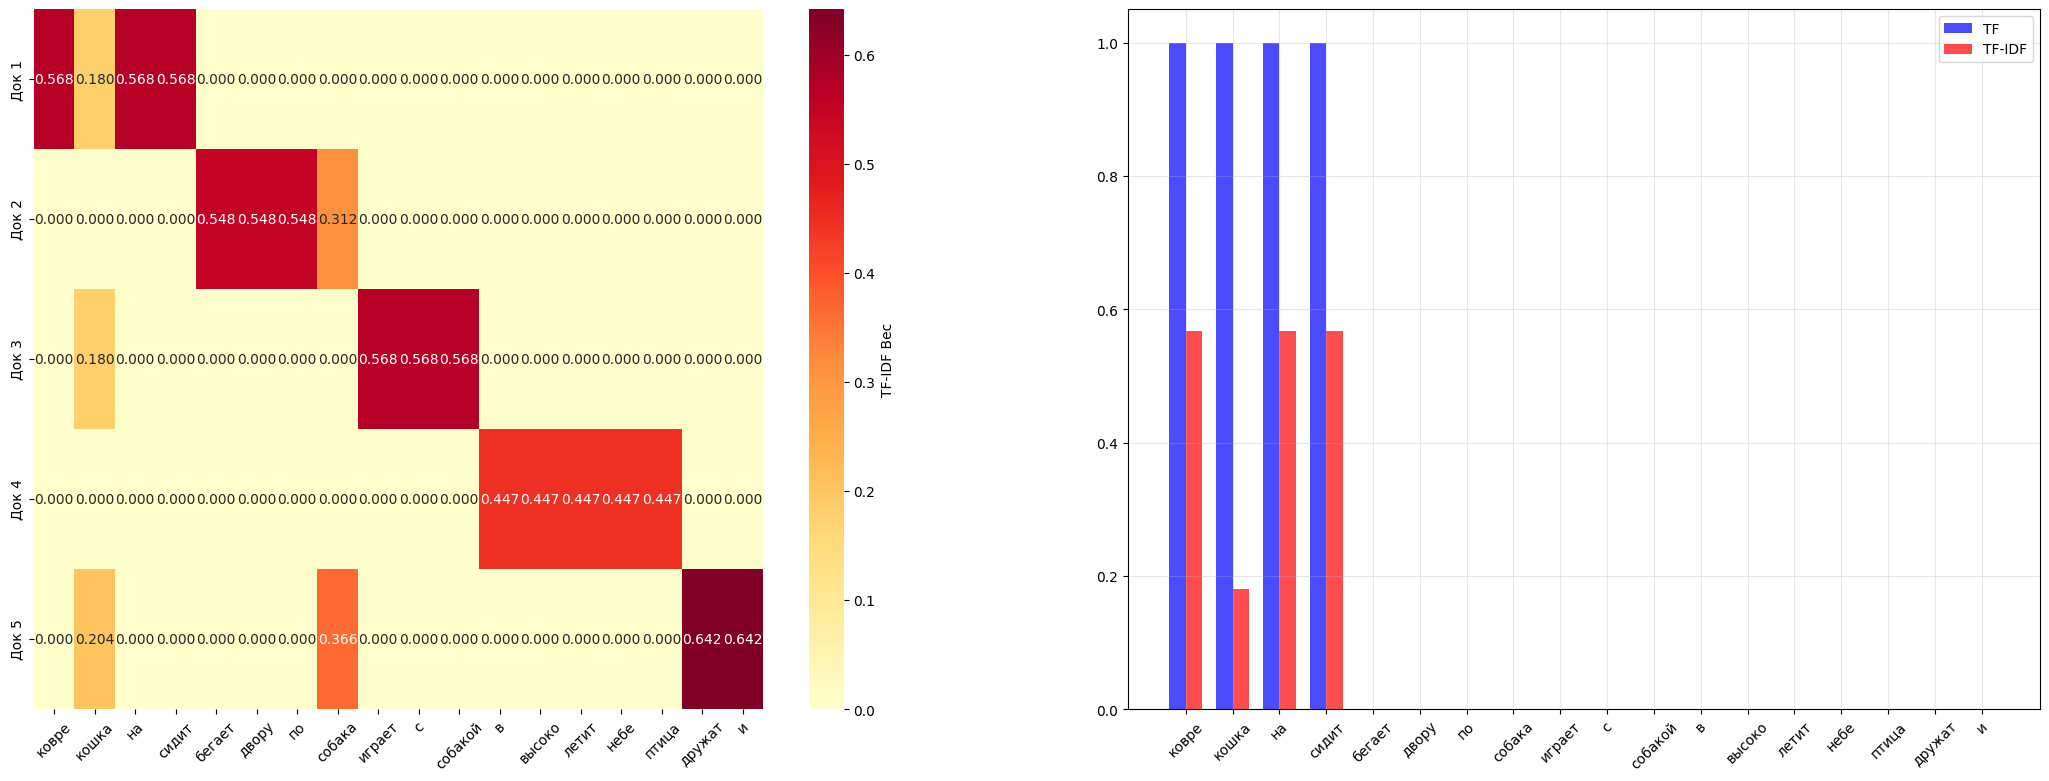

In [ ]:
# Преобразуем TF-IDF в плотную матрицу для визуализации
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return dense_vectors

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)
tfidf_matrix = np.array(tfidf_dense)
words = list(dictionary.token2id.keys())
doc_names = [f"Док {i+1}" for i in range(len(tfidf_corpus))]

plt.figure(figsize=(40, 20))

plt.subplot(2, 3, 1)
sns.heatmap(tfidf_matrix,
            annot=True,
            fmt='.3f',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Вес'})
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
# Получаем исходные TF значения из bow_corpus
tf_dense = bow_to_dense(bow_corpus, dictionary)
tf_matrix = np.array(tf_dense)

# Сравниваем TF и TF-IDF для первого документа
doc_idx = 0
x_pos = np.arange(len(words))
width = 0.35

plt.bar(x_pos - width/2, tf_matrix[doc_idx], width, label='TF', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, tfidf_matrix[doc_idx], width, label='TF-IDF', alpha=0.7, color='red')
plt.xticks(x_pos, words, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

#### **1. TF (Term Frequency) - Частота термина**
```python
TF(t,d) = count(t,d) / total_terms(d)
```
или упрощенно:
```python
TF(t,d) = count(t,d)  # просто количество вхождений
```

#### **2. IDF (Inverse Document Frequency) - Обратная частота документа**
```python
IDF(t) = log( N / (DF(t) + 1) ) + 1
```
Где:
- **N** - общее количество документов
- **DF(t)** - количество документов, содержащих слово t
- **+1** в знаменателе - сглаживание, чтобы не было "околонулевых" значений (smoothing)
- **+1** в конце - для избежания нулевых весов

#### **3. TF-IDF - итоговый вес**
```python
TF-IDF(t,d) = TF(t,d) × IDF(t)
```

**Сравнение разных формул IDF**

| Формула | Редкое слово (DF=1) | Частое слово (DF=100) | Сверхчастое (DF=990) |
|---------|---------------------|----------------------|---------------------|
| `log(N/DF)` | 6.91 | 2.30 | 0.01 |
| `log(N/(DF+1))` | 6.90 | 2.29 | 0.009 |
| `log(N/(DF+1)) + 1` | **7.90** | **3.29** | **1.009** |


### Word2Vec

In [ ]:
# Используем небольшую модель для демонстрации
print("Загрузка предобученной модели Word2Vec...")
w2v_model = api.load("glove-wiki-gigaword-50")  # Маленькая модель

# Функция для получения эмбеддинга документа
def get_doc_embedding(tokens, model):
    word_vectors = []
    for token in tokens:
        try:
            word_vectors.append(model[token])
        except KeyError:
            continue
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Получаем эмбеддинги для документов
doc_embeddings = []
for i, tokens in enumerate(tokenized_docs):
    embedding = get_doc_embedding(tokens, w2v_model)
    doc_embeddings.append(embedding)
    print(f"\nДокумент {i+1}: {documents[i]}")
    print(f"Эмбеддинг (первые 10 значений): {embedding[:10].round(4)}")
    print(f"Размер: {embedding.shape}")

# Косинусная схожесть между документами
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(doc_embeddings)
print("\nМатрица косинусной схожести:")
print("     Д1    Д2    Д3    Д4    Д5")
for i, row in enumerate(similarity_matrix):
    print(f"Д{i+1}  " + "  ".join([f"{x:.3f}" for x in row]))

Загрузка предобученной модели Word2Vec...

Документ 1: кошка сидит на ковре
Эмбеддинг (первые 10 значений): [-1.3191  1.5595  0.0702 -0.4633 -0.8065  0.3126  1.2403 -0.6641 -1.1753
 -0.4418]
Размер: (50,)

Документ 2: собака бегает по двору
Эмбеддинг (первые 10 значений): [-1.1564  0.7363 -0.162  -0.0846 -0.9603  0.3709  1.9096  0.0091 -0.388
 -0.8261]
Размер: (50,)

Документ 3: кошка играет с собакой
Эмбеддинг (первые 10 значений): [-1.5624  0.9866  0.1836 -1.0273 -0.8551 -0.0476  1.141  -0.6877 -0.2825
 -0.7102]
Размер: (50,)

Документ 4: птица летит высоко в небе
Эмбеддинг (первые 10 значений): [-1.0499  1.3412 -0.3431 -0.8776 -1.2784  0.1292  1.812  -0.3816 -0.9911
 -0.2818]
Размер: (50,)

Документ 5: собака и кошка дружат
Эмбеддинг (первые 10 значений): [-0.9957  1.3808 -0.3036 -0.7568 -0.9025  0.2521  1.4351 -0.4907 -1.3925
 -0.1646]
Размер: (50,)

Матрица косинусной схожести:
     Д1    Д2    Д3    Д4    Д5
Д1  1.000  0.856  0.811  0.873  0.873
Д2  0.856  1.000  0.784  0.859  0.

*Как работает Word2Vec мы разберем на следующей лекции..*

### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [ ]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-10-21 14:22:54--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv.5’

test.csv.5          100%[===================>] 100.42K  --.-KB/s    in 0.002s  

2025-10-21 14:22:54 (62.4 MB/s) - ‘test.csv.5’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [ ]:
pip install pandas


In [ ]:
import pandas as pd

# Загружаем CSV файл
df = pd.read_csv('test.csv.5')

print("✓ CSV файл успешно загружен!")
print(f"✓ Размер DataFrame: {df.shape}")
print(f"✓ Столбцы: {list(df.columns)}")

# Сохраняем столбец с текстами в переменную
texts = df['text'].tolist()

print(f"\n✓ Столбец 'text' успешно извлечен в переменную 'texts'")



✓ CSV файл успешно загружен!
✓ Размер DataFrame: (870, 3)
✓ Столбцы: ['text', 'label', 'source']

✓ Столбец 'text' успешно извлечен в переменную 'texts'


3. Извлечь столбец с текстами (макс. балл == 1)

In [ ]:
import pandas as pd

# Загружаем CSV файл
df = pd.read_csv('test.csv.5')

# Извлекаем столбец с текстами в переменную
texts = df['text'].tolist()

print("✓ Столбец с текстами успешно извлечен!")
print(f"✓ Переменная 'texts' содержит {len(texts)} текстов")
print(f"✓ Тип данных: {type(texts)}")
print(f"✓ Тип элементов: {type(texts[0])}")


✓ Столбец с текстами успешно извлечен!
✓ Переменная 'texts' содержит 870 текстов
✓ Тип данных: <class 'list'>
✓ Тип элементов: <class 'str'>


4. Построить Bag-of-Words (макс. балл == 3)

✓ Данные загружены
✓ Количество текстов: 870

✓ Предобработка завершена
Примеры до и после обработки:
До: Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thin...
После: trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thin...

✓ Словарь создан
✓ Размер словаря: 4028 слов
✓ Примеры слов из словаря: ['1', '10', '100', '1000', '10883', '109', '11', '1130', '12', '129']

✓ BoW векторы созданы
✓ Размерность векторов: 4028
✓ Пример BoW вектора для первого документа:
  Ненулевые элементы: 18
  Первые 20 значений: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

АЛЬТЕРНАТИВНЫЙ СПОСОБ (sklearn)
✓ Sklearn BoW матрица создана
✓ Размер матрицы: (870, 1000)
✓ Примеры фич: ['a' 'abortion' 'about' 'absolutely' 'accept' 'access' 'action' 'actually'
 'ad' 'admin' 'affect' 'after' 'again' 'against' 'ago' 'ahead' 'ai'
 'aleppo' 'ali' 'all']

✓ Таблица частот слов создана

Топ-20 самых частых слов:


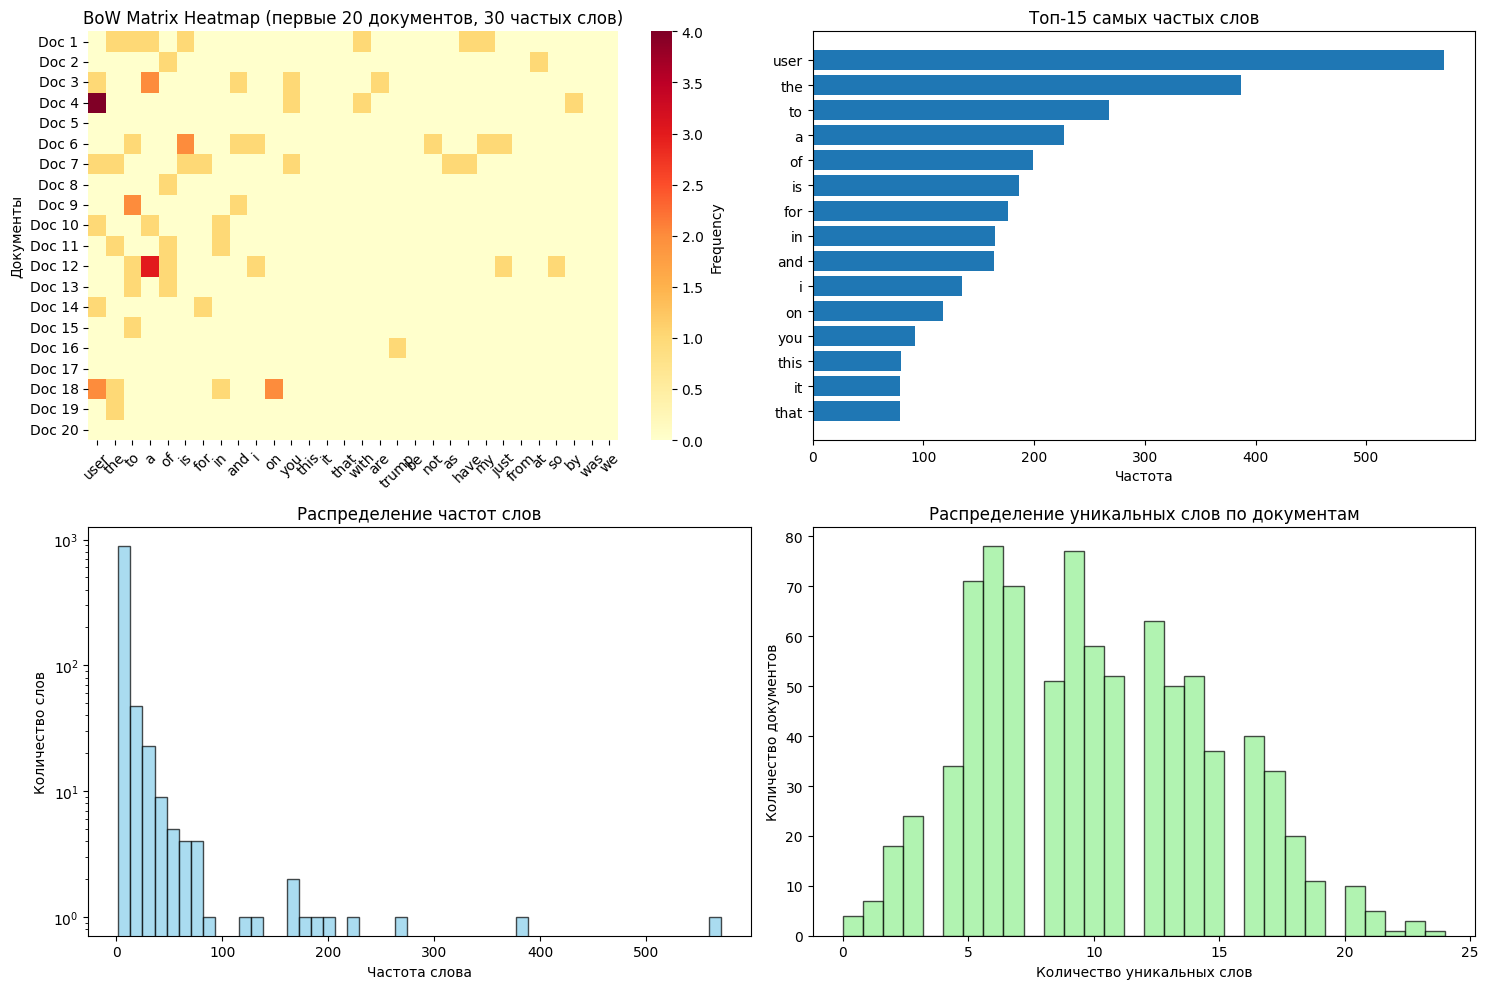


АНАЛИЗ РЕЗУЛЬТАТОВ
Общая статистика:
• Всего документов: 870
• Размер словаря: 1000
• Разреженность матрицы: 99.00%
• Среднее количество слов в документе: 10.0
• Самое частое слово: 'user' (встречается 570 раз)
• Среди топ-50 слов есть стоп-слова: ['the', 'and', 'to', 'a', 'of', 'in', 'is', 'it', 'you', 'that', 'for', 'on', 'with', 'as', 'was', 'are', 'this', 'have', 'not']

✓ Bag-of-Words модель успешно построена и визуализирована!


/tmp/ipython-input-2364955890.py:162: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient. Try using != instead.
  print(f"• Разреженность матрицы: {(bow_matrix == 0).mean():.2%}")


In [ ]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Загружаем данные
df = pd.read_csv('test.csv.5')
texts = df['text'].tolist()

print("✓ Данные загружены")
print(f"✓ Количество текстов: {len(texts)}")

# Задача 1.1: Создайте словарь и BoW представление

def preprocess_text(text):
    """Предобработка текста: приведение к нижнему регистру и удаление знаков препинания"""
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем знаки препинания, оставляем только буквы и пробелы
    text = re.sub(r'[^\w\s]', '', text)
    # Удаляем лишние пробелы
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Применяем предобработку ко всем текстам
processed_texts = [preprocess_text(text) for text in texts]

print("\n✓ Предобработка завершена")
print("Примеры до и после обработки:")
print(f"До: {texts[0][:100]}...")
print(f"После: {processed_texts[0][:100]}...")

# Создаем словарь вручную
def build_vocabulary(texts):
    """Построение словаря из предобработанных текстов"""
    vocabulary = set()
    for text in texts:
        words = text.split()
        vocabulary.update(words)
    return sorted(list(vocabulary))

vocabulary = build_vocabulary(processed_texts)
print(f"\n✓ Словарь создан")
print(f"✓ Размер словаря: {len(vocabulary)} слов")
print(f"✓ Примеры слов из словаря: {vocabulary[:10]}")

# Создаем BoW представление вручную
def texts_to_bow(texts, vocabulary):
    """Преобразование текстов в BoW векторы"""
    word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}
    bow_vectors = []

    for text in texts:
        words = text.split()
        word_count = Counter(words)
        vector = [word_count.get(word, 0) for word in vocabulary]
        bow_vectors.append(vector)

    return bow_vectors, word_to_idx

bow_vectors, word_to_idx = texts_to_bow(processed_texts, vocabulary)

print(f"\n✓ BoW векторы созданы")
print(f"✓ Размерность векторов: {len(bow_vectors[0])}")
print(f"✓ Пример BoW вектора для первого документа:")
print(f"  Ненулевые элементы: {sum(1 for x in bow_vectors[0] if x > 0)}")
print(f"  Первые 20 значений: {bow_vectors[0][:20]}")

# Альтернативный способ с использованием sklearn (более эффективный)
print("\n" + "="*50)
print("АЛЬТЕРНАТИВНЫЙ СПОСОБ (sklearn)")
print("="*50)

vectorizer = CountVectorizer(
    lowercase=True,      # уже сделали, но для надежности
    token_pattern=r'\b[a-zA-Z]+\b',  # токенизация по словам
    max_features=1000    # ограничим размер словаря для визуализации
)

# Создаем матрицу документы-термины
bow_matrix = vectorizer.fit_transform(processed_texts)
feature_names = vectorizer.get_feature_names_out()

print(f"✓ Sklearn BoW матрица создана")
print(f"✓ Размер матрицы: {bow_matrix.shape}")
print(f"✓ Примеры фич: {feature_names[:20]}")

# Задача 1.2: Визуализируйте результаты

# 1. Таблица частот слов
word_frequencies = np.array(bow_matrix.sum(axis=0)).flatten()
word_freq_df = pd.DataFrame({
    'word': feature_names,
    'frequency': word_frequencies
}).sort_values('frequency', ascending=False)

print(f"\n✓ Таблица частот слов создана")
print("\nТоп-20 самых частых слов:")
print(word_freq_df.head(20))

# 2. Heatmap матрицы BoW
plt.figure(figsize=(15, 10))

# Для визуализации возьмем первые 20 документов и 30 самых частых слов
top_words = word_freq_df.head(30)['word'].values
doc_indices = range(20)

# Создаем подматрицу для визуализации
bow_dense = bow_matrix.toarray()
visualization_matrix = bow_dense[doc_indices][:, [np.where(feature_names == word)[0][0] for word in top_words]]

plt.subplot(2, 2, 1)
sns.heatmap(visualization_matrix,
            xticklabels=top_words,
            yticklabels=[f'Doc {i+1}' for i in doc_indices],
            cmap='YlOrRd',
            annot=False,
            cbar_kws={'label': 'Frequency'})
plt.title('BoW Matrix Heatmap (первые 20 документов, 30 частых слов)')
plt.xticks(rotation=45)
plt.ylabel('Документы')

# 3. График самых частых слов
plt.subplot(2, 2, 2)
top_15_words = word_freq_df.head(15)
plt.barh(range(len(top_15_words)), top_15_words['frequency'])
plt.yticks(range(len(top_15_words)), top_15_words['word'])
plt.xlabel('Частота')
plt.title('Топ-15 самых частых слов')
plt.gca().invert_yaxis()

# 4. Распределение частот слов
plt.subplot(2, 2, 3)
plt.hist(word_frequencies, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Частота слова')
plt.ylabel('Количество слов')
plt.title('Распределение частот слов')
plt.yscale('log')

# 5. Количество уникальных слов в документах
plt.subplot(2, 2, 4)
unique_words_per_doc = [np.count_nonzero(bow_dense[i]) for i in range(bow_dense.shape[0])]
plt.hist(unique_words_per_doc, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Количество уникальных слов')
plt.ylabel('Количество документов')
plt.title('Распределение уникальных слов по документам')

plt.tight_layout()
plt.show()

# Дополнительная информация
print("\n" + "="*50)
print("АНАЛИЗ РЕЗУЛЬТАТОВ")
print("="*50)

print(f"Общая статистика:")
print(f"• Всего документов: {len(texts)}")
print(f"• Размер словаря: {len(feature_names)}")
print(f"• Разреженность матрицы: {(bow_matrix == 0).mean():.2%}")
print(f"• Среднее количество слов в документе: {np.mean(unique_words_per_doc):.1f}")
print(f"• Самое частое слово: '{word_freq_df.iloc[0]['word']}' (встречается {word_freq_df.iloc[0]['frequency']} раз)")

# Анализ стоп-слов (если нужно их удалить)
common_stopwords = ['the', 'and', 'to', 'a', 'of', 'in', 'is', 'it', 'you', 'that', 'for', 'on', 'with', 'as', 'was', 'are', 'this', 'but', 'have', 'not']
stopwords_in_top = [word for word in common_stopwords if word in word_freq_df['word'].values[:50]]
print(f"• Среди топ-50 слов есть стоп-слова: {stopwords_in_top}")

print("\n✓ Bag-of-Words модель успешно построена и визуализирована!")

5. Построить TF-IDF (макс. балл == 5)

✓ Данные загружены
✓ Количество текстов: 870
✓ Тексты предобработаны и токенизированы
✓ Словарь создан, размер: 4028 слов
✓ BoW корпус создан
✓ TF-IDF модель создана
✓ TF-IDF корпус содержит 870 документов
✓ TF-IDF матрица создана, размер: (870, 4028)
✓ TF, DF, IDF вычислены вручную
✓ Анализ TF-IDF завершен
✓ Проанализировано 4028 слов
✓ Результаты сохранены в файл: tfidf_analysis.csv


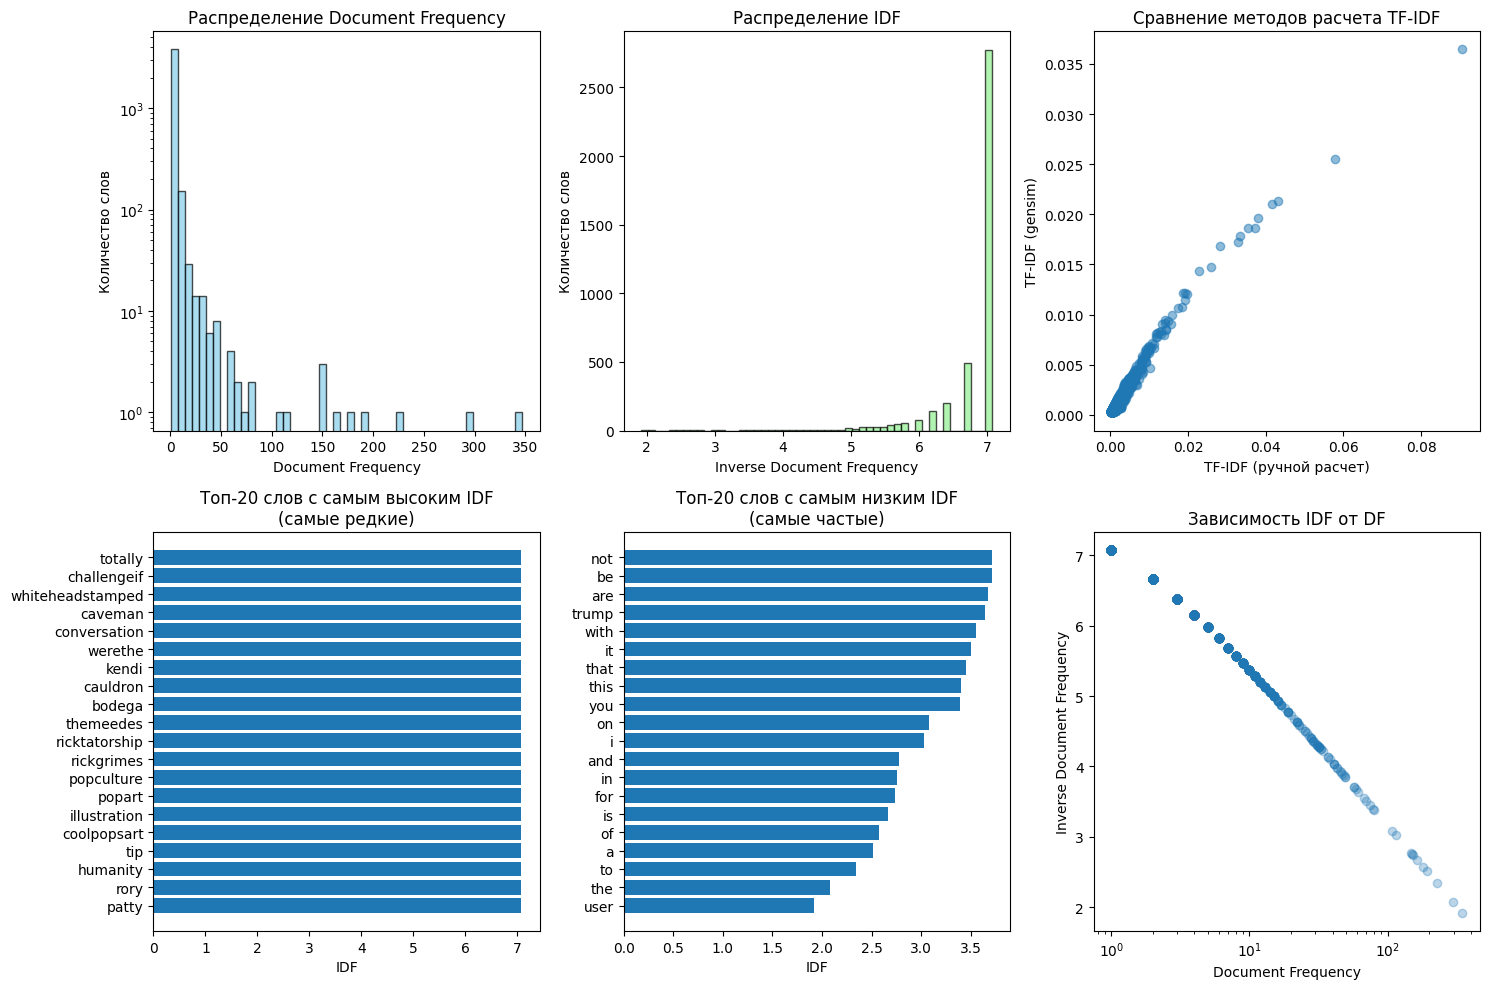


ДЕТАЛЬНЫЙ АНАЛИЗ TF-IDF ДЛЯ ПЕРВЫХ 3 ДОКУМЕНТОВ

--- Документ 1 ---
Исходный текст: Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thin...
Топ-10 слов по TF-IDF:
  'caveman': TF=0.0556, DF=1, IDF=7.0765, TF-IDF=0.3496
  'conversation': TF=0.0556, DF=1, IDF=7.0765, TF-IDF=0.3496
  'infuriating': TF=0.0556, DF=1, IDF=7.0765, TF-IDF=0.3496
  'pointless': TF=0.0556, DF=1, IDF=7.0765, TF-IDF=0.3496
  'dad': TF=0.0556, DF=2, IDF=6.6710, TF-IDF=0.3138
  'trying': TF=0.0556, DF=3, IDF=6.3833, TF-IDF=0.2929
  'ever': TF=0.0556, DF=6, IDF=5.8237, TF-IDF=0.2571
  'thing': TF=0.0556, DF=9, IDF=5.4671, TF-IDF=0.2361
  'vegetarianism': TF=0.0556, DF=11, IDF=5.2847, TF-IDF=0.2258
  'most': TF=0.0556, DF=15, IDF=4.9971, TF-IDF=0.2098

--- Документ 2 ---
Исходный текст: #latestnews 4 #newmexico #politics + #nativeamerican + #Israel + #Palestine  -  Protesting Rise Of A...
Топ-10 слов по TF-IDF:
  'latestnews': TF=0.0833, DF=1, IDF=7.0765, TF-IDF=0.3693


In [ ]:
import pandas as pd
import numpy as np
from gensim import corpora, models
from gensim.models import TfidfModel
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import math

# Загружаем данные
df = pd.read_csv('test.csv.5')
texts = df['text'].tolist()

print("✓ Данные загружены")
print(f"✓ Количество текстов: {len(texts)}")

# Предобработка текстов
def preprocess_text(text):
    """Предобработка текста"""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Применяем предобработку
processed_texts = [preprocess_text(text) for text in texts]
tokenized_docs = [doc.split() for doc in processed_texts]

print("✓ Тексты предобработаны и токенизированы")

# Задача 2.1: Примените TF-IDF к BoW представлению

# Создаем словарь
dictionary = corpora.Dictionary(tokenized_docs)
print(f"✓ Словарь создан, размер: {len(dictionary)} слов")

# Создаем BoW корпус
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print("✓ BoW корпус создан")

# Создаем TF-IDF модель
tfidf_model = TfidfModel(bow_corpus, smartirs='ntc')  # normal tf, idf, cosine normalization
tfidf_corpus = tfidf_model[bow_corpus]

print("✓ TF-IDF модель создана")
print(f"✓ TF-IDF корпус содержит {len(tfidf_corpus)} документов")

# Преобразуем TF-IDF в плотную матрицу для анализа
def tfidf_to_dense_matrix(tfidf_corpus, dictionary):
    """Преобразование TF-IDF корпуса в плотную матрицу"""
    dense_matrix = np.zeros((len(tfidf_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(tfidf_corpus):
        for word_idx, score in doc:
            dense_matrix[doc_idx, word_idx] = score
    return dense_matrix

tfidf_matrix = tfidf_to_dense_matrix(tfidf_corpus, dictionary)
print(f"✓ TF-IDF матрица создана, размер: {tfidf_matrix.shape}")

# Задача 2.2: Проанализируйте веса TF-IDF

# Вычисляем TF, DF, IDF и TF-IDF вручную для анализа
def calculate_tf_df_idf(tokenized_docs, dictionary):
    """Ручной расчет TF, DF, IDF"""
    N = len(tokenized_docs)  # общее количество документов

    # Document Frequency (DF)
    df = defaultdict(int)
    for doc in tokenized_docs:
        unique_words = set(doc)
        for word in unique_words:
            if word in dictionary.token2id:
                df[word] += 1

    # Term Frequency (TF) для каждого документа
    tf_per_doc = []
    for doc in tokenized_docs:
        doc_length = len(doc)
        tf_doc = defaultdict(float)
        word_count = defaultdict(int)

        # Считаем частоты слов
        for word in doc:
            word_count[word] += 1

        # Нормализуем по длине документа
        for word, count in word_count.items():
            tf_doc[word] = count / doc_length

        tf_per_doc.append(tf_doc)

    # Inverse Document Frequency (IDF)
    idf = {}
    for word in dictionary.token2id:
        df_word = df.get(word, 0)
        # Стандартная формула IDF с сглаживанием
        idf[word] = math.log((N + 1) / (df_word + 1)) + 1

    return tf_per_doc, df, idf

# Вычисляем метрики
tf_per_doc, df_dict, idf_dict = calculate_tf_df_idf(tokenized_docs, dictionary)

print("✓ TF, DF, IDF вычислены вручную")

# Создаем детальный анализ для каждого слова
word_analysis = []

for word_id, word in dictionary.items():
    word_str = word
    df_value = df_dict.get(word_str, 0)
    idf_value = idf_dict.get(word_str, 0)

    # Вычисляем TF-IDF вручную для сравнения
    manual_tfidf_scores = []
    for doc_idx, tf_doc in enumerate(tf_per_doc):
        tf_value = tf_doc.get(word_str, 0)
        tfidf_manual = tf_value * idf_value
        manual_tfidf_scores.append(tfidf_manual)

    # Средний TF-IDF по документам
    avg_tfidf_manual = np.mean(manual_tfidf_scores) if manual_tfidf_scores else 0
    avg_tfidf_gensim = np.mean(tfidf_matrix[:, word_id])

    word_analysis.append({
        'word_id': word_id,
        'word': word_str,
        'document_frequency': df_value,
        'inverse_document_frequency': idf_value,
        'avg_tfidf_manual': avg_tfidf_manual,
        'avg_tfidf_gensim': avg_tfidf_gensim,
        'percentage_docs': (df_value / len(tokenized_docs)) * 100
    })

# Создаем DataFrame с анализом
analysis_df = pd.DataFrame(word_analysis)

# Сортируем по IDF (самые редкие слова имеют высокий IDF)
analysis_df_sorted = analysis_df.sort_values('inverse_document_frequency', ascending=False)

print("✓ Анализ TF-IDF завершен")
print(f"✓ Проанализировано {len(analysis_df)} слов")

# Сохраняем результаты в CSV
output_filename = 'tfidf_analysis.csv'
analysis_df_sorted.to_csv(output_filename, index=False, encoding='utf-8')

print(f"✓ Результаты сохранены в файл: {output_filename}")

# Визуализация результатов
plt.figure(figsize=(15, 10))

# 1. Распределение Document Frequency
plt.subplot(2, 3, 1)
plt.hist(analysis_df['document_frequency'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Document Frequency')
plt.ylabel('Количество слов')
plt.title('Распределение Document Frequency')
plt.yscale('log')

# 2. Распределение IDF
plt.subplot(2, 3, 2)
plt.hist(analysis_df['inverse_document_frequency'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Inverse Document Frequency')
plt.ylabel('Количество слов')
plt.title('Распределение IDF')

# 3. Сравнение ручного и gensim TF-IDF
plt.subplot(2, 3, 3)
plt.scatter(analysis_df['avg_tfidf_manual'], analysis_df['avg_tfidf_gensim'], alpha=0.5)
plt.xlabel('TF-IDF (ручной расчет)')
plt.ylabel('TF-IDF (gensim)')
plt.title('Сравнение методов расчета TF-IDF')

# 4. Топ-20 слов с самым высоким IDF (самые редкие)
plt.subplot(2, 3, 4)
top_idf_words = analysis_df_sorted.head(20)
plt.barh(range(len(top_idf_words)), top_idf_words['inverse_document_frequency'])
plt.yticks(range(len(top_idf_words)), top_idf_words['word'])
plt.xlabel('IDF')
plt.title('Топ-20 слов с самым высоким IDF\n(самые редкие)')
plt.gca().invert_yaxis()

# 5. Топ-20 слов с самым низким IDF (самые частые)
plt.subplot(2, 3, 5)
bottom_idf_words = analysis_df_sorted.tail(20)
plt.barh(range(len(bottom_idf_words)), bottom_idf_words['inverse_document_frequency'])
plt.yticks(range(len(bottom_idf_words)), bottom_idf_words['word'])
plt.xlabel('IDF')
plt.title('Топ-20 слов с самым низким IDF\n(самые частые)')
plt.gca().invert_yaxis()

# 6. Зависимость IDF от DF
plt.subplot(2, 3, 6)
plt.scatter(analysis_df['document_frequency'], analysis_df['inverse_document_frequency'], alpha=0.3)
plt.xlabel('Document Frequency')
plt.ylabel('Inverse Document Frequency')
plt.title('Зависимость IDF от DF')
plt.xscale('log')

plt.tight_layout()
plt.show()

# Детальный анализ для нескольких документов
print("\n" + "="*60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ TF-IDF ДЛЯ ПЕРВЫХ 3 ДОКУМЕНТОВ")
print("="*60)

for doc_idx in range(3):
    print(f"\n--- Документ {doc_idx + 1} ---")
    print(f"Исходный текст: {texts[doc_idx][:100]}...")

    # Получаем TF-IDF векторы для документа
    tfidf_vector = tfidf_corpus[doc_idx]

    # Сортируем слова по TF-IDF весу
    sorted_tfidf = sorted(tfidf_vector, key=lambda x: x[1], reverse=True)[:10]

    print("Топ-10 слов по TF-IDF:")
    for word_id, score in sorted_tfidf:
        word = dictionary[word_id]
        tf_value = tf_per_doc[doc_idx].get(word, 0)
        df_value = df_dict.get(word, 0)
        idf_value = idf_dict.get(word, 0)

        print(f"  '{word}': TF={tf_value:.4f}, DF={df_value}, IDF={idf_value:.4f}, TF-IDF={score:.4f}")

# Статистика по корпусу
print("\n" + "="*60)
print("СТАТИСТИКА ПО КОРПУСУ")
print("="*60)

print(f"Общее количество документов: {len(tokenized_docs)}")
print(f"Общее количество уникальных слов: {len(dictionary)}")
print(f"Среднее количество слов в документе: {np.mean([len(doc) for doc in tokenized_docs]):.1f}")

# Анализ разреженности
tfidf_nonzero = np.count_nonzero(tfidf_matrix)
tfidf_total = tfidf_matrix.size
sparsity = 1 - (tfidf_nonzero / tfidf_total)

print(f"Разреженность TF-IDF матрицы: {sparsity:.2%}")
print(f"Средний TF-IDF вес: {np.mean(tfidf_matrix):.6f}")
print(f"Максимальный TF-IDF вес: {np.max(tfidf_matrix):.6f}")

# Анализ слов с экстремальными значениями
print(f"\nСлово с максимальным IDF (самое редкое):")
max_idf_row = analysis_df.loc[analysis_df['inverse_document_frequency'].idxmax()]
print(f"  Слово: '{max_idf_row['word']}', IDF: {max_idf_row['inverse_document_frequency']:.4f}, DF: {max_idf_row['document_frequency']}")

print(f"\nСлово с минимальным IDF (самое частое):")
min_idf_row = analysis_df.loc[analysis_df['inverse_document_frequency'].idxmin()]
print(f"  Слово: '{min_idf_row['word']}', IDF: {min_idf_row['inverse_document_frequency']:.4f}, DF: {min_idf_row['document_frequency']}")

# Проверка корреляции между ручным расчетом и gensim
correlation = np.corrcoef(analysis_df['avg_tfidf_manual'], analysis_df['avg_tfidf_gensim'])[0, 1]
print(f"\nКорреляция между ручным расчетом и gensim: {correlation:.4f}")

print(f"\n✓ Файл '{output_filename}' сохранен в текущей директории")
print("✓ TF-IDF анализ завершен!")

##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

In [ ]:
# Сравните BoW и TF-IDF для конкретных слов
# - Выберите 3-4 слова из датасета (выберите слова, характерные для датасета)
# - Постройте графики сравнения их весов в BoW и TF-IDF

##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```

✓ Матрицы BoW и TF-IDF подготовлены для сравнения
Выбранные слова для сравнения:
1. 'the': DF=295, Avg BoW=1.312, Avg TF-IDF=0.075
2. 'tight': DF=1, Avg BoW=3.000, Avg TF-IDF=0.831
3. 'love': DF=20, Avg BoW=1.100, Avg TF-IDF=0.239
4. 'trump': DF=61, Avg BoW=1.016, Avg TF-IDF=0.153


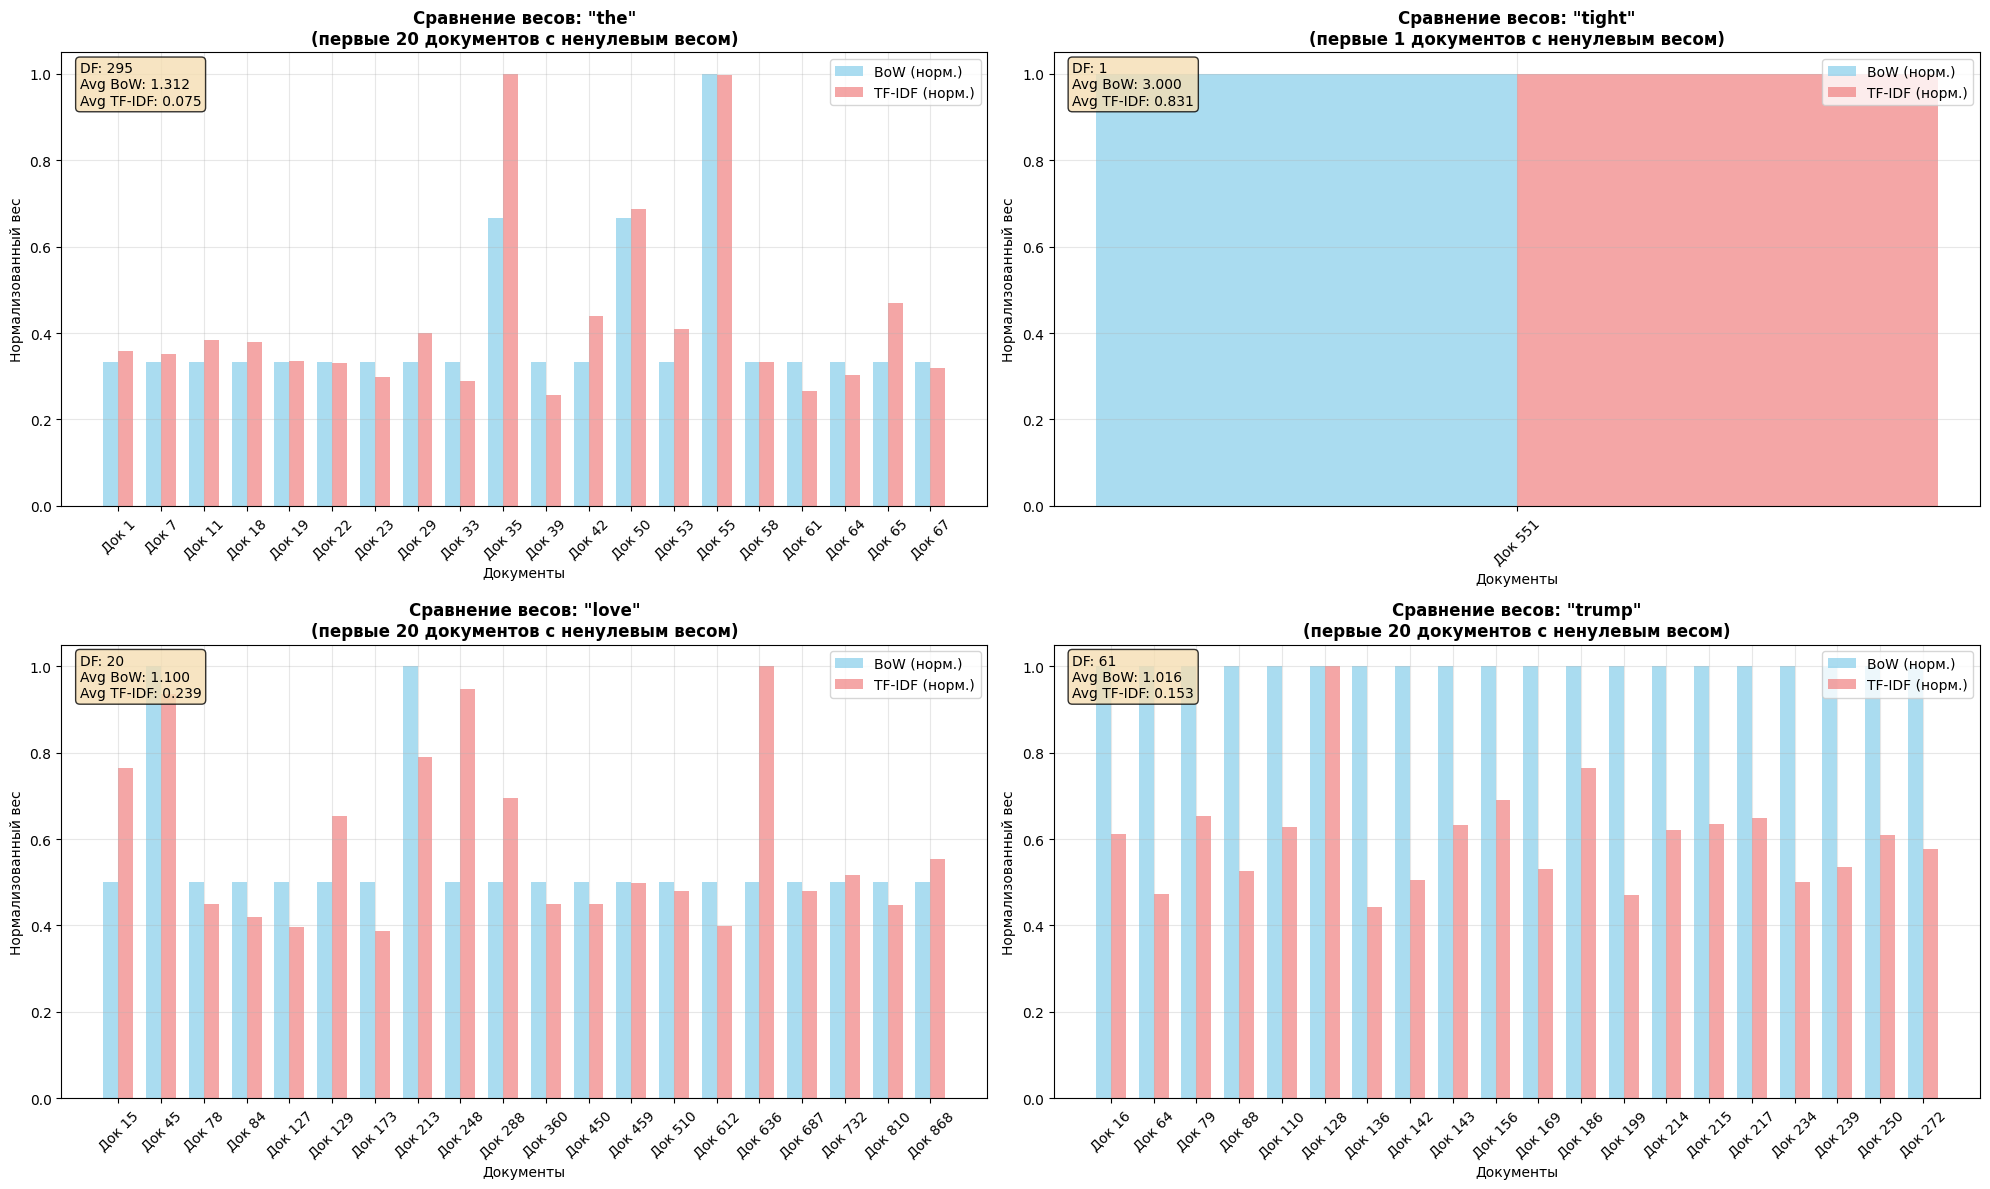

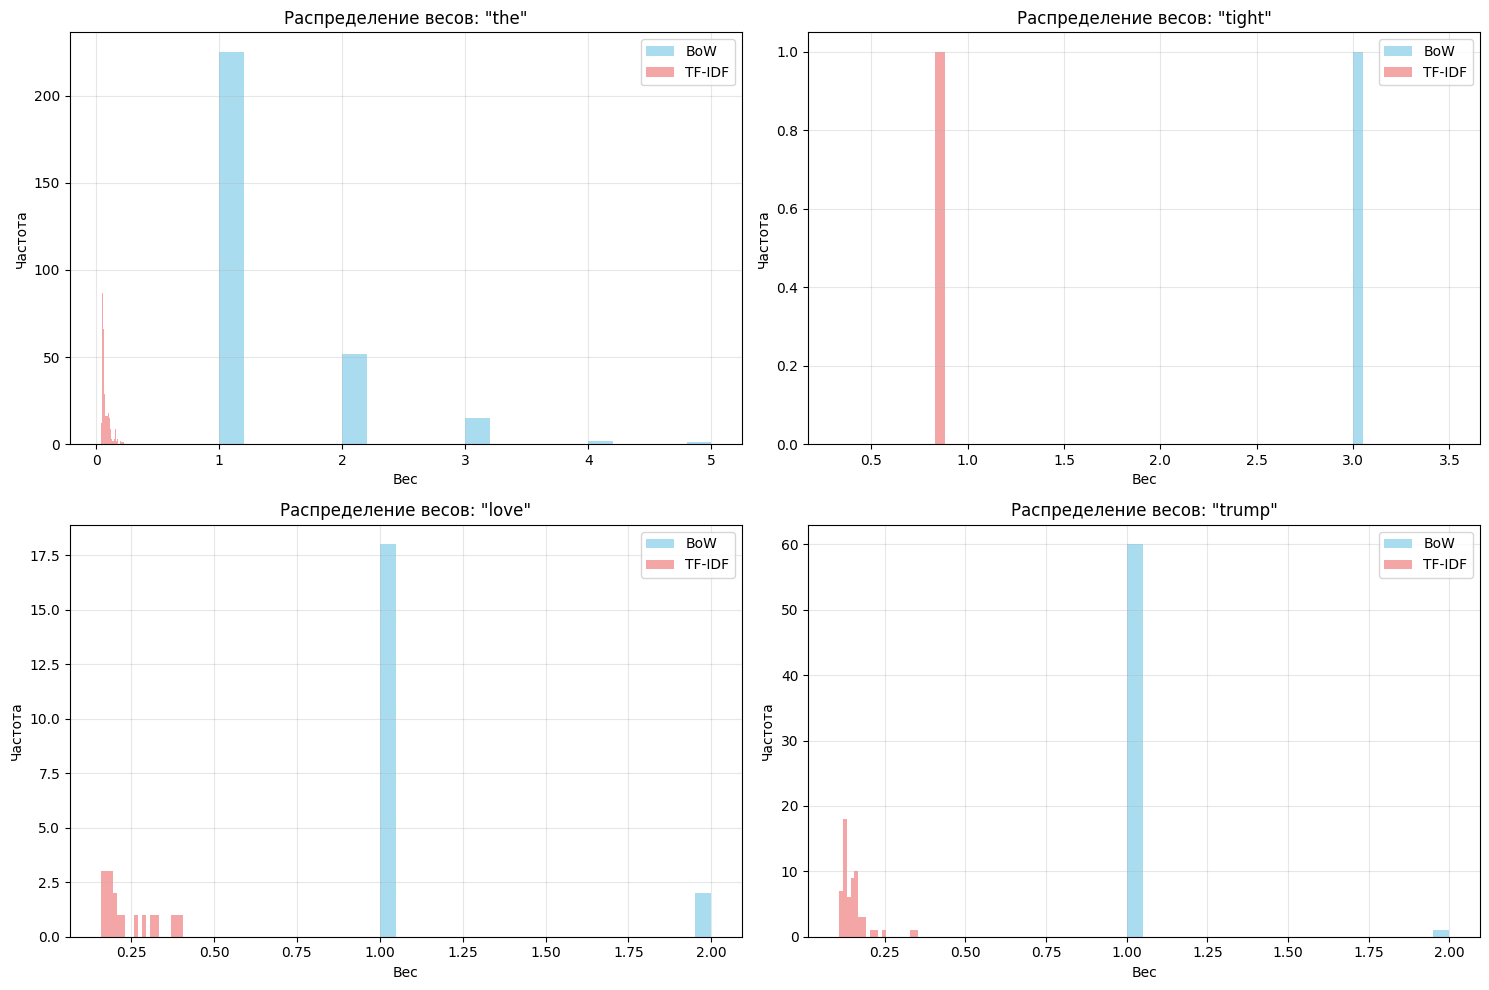


СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ BoW И TF-IDF
Общая статистика по всем словам:
BoW:
  • Средний вес: 1.0650
  • Медианный вес: 1.0000
  • Максимальный вес: 7.0000
  • Стандартное отклонение: 0.3142
TF-IDF:
  • Средний вес: 0.2447
  • Медианный вес: 0.2478
  • Максимальный вес: 0.9823
  • Стандартное отклонение: 0.1105

Корреляция между BoW и TF-IDF:
  • Средняя корреляция: 0.7982
  • Медианная корреляция: 0.8452

Анализ по типам слов:
Частые слова (DF > 100, 11 слов):
  • Среднее отношение TF-IDF/BoW: 0.0846
Редкие слова (DF < 10, 3851 слов):
  • Среднее отношение TF-IDF/BoW: 0.3344


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora, models
import re

# Загружаем данные
df = pd.read_csv('test.csv.5')
texts = df['text'].tolist()

# Предобработка текстов
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

processed_texts = [preprocess_text(text) for text in texts]
tokenized_docs = [doc.split() for doc in processed_texts]

# Создаем словарь и BoW корпус
dictionary = corpora.Dictionary(tokenized_docs)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Создаем TF-IDF модель
tfidf_model = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

# Преобразуем в плотные матрицы для сравнения
def corpus_to_dense_matrix(corpus, dictionary_size):
    dense_matrix = np.zeros((len(corpus), dictionary_size))
    for doc_idx, doc in enumerate(corpus):
        for word_idx, score in doc:
            dense_matrix[doc_idx, word_idx] = score
    return dense_matrix

bow_dense = corpus_to_dense_matrix(bow_corpus, len(dictionary))
tfidf_dense = corpus_to_dense_matrix(tfidf_corpus, len(dictionary))

print("✓ Матрицы BoW и TF-IDF подготовлены для сравнения")

# Функция для сравнения BoW и TF-IDF
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    axes = axes.flatten()

    for i, word in enumerate(words):
        if word not in dictionary.token2id:
            print(f"Слово '{word}' не найдено в словаре")
            continue

        word_id = dictionary.token2id[word]

        # Веса для этого слова во всех документах
        bow_weights = bow_dense[:, word_id]
        tfidf_weights = tfidf_dense[:, word_id]

        # Берем только документы, где слово встречается
        nonzero_indices = np.where(bow_weights > 0)[0]

        if len(nonzero_indices) == 0:
            print(f"Слово '{word}' не встречается ни в одном документе")
            continue

        # Ограничиваем количество документов для визуализации (первые 20 с ненулевым весом)
        max_docs = min(20, len(nonzero_indices))
        display_indices = nonzero_indices[:max_docs]

        x = range(len(display_indices))
        bow_display = bow_weights[display_indices]
        tfidf_display = tfidf_weights[display_indices]

        # Нормализуем для лучшего сравнения
        if np.max(bow_display) > 0:
            bow_display_norm = bow_display / np.max(bow_display)
        else:
            bow_display_norm = bow_display

        if np.max(tfidf_display) > 0:
            tfidf_display_norm = tfidf_display / np.max(tfidf_display)
        else:
            tfidf_display_norm = tfidf_display

        # Строим графики
        bar_width = 0.35
        axes[i].bar(x, bow_display_norm, width=bar_width, alpha=0.7, label='BoW (норм.)', color='skyblue')
        axes[i].bar([p + bar_width for p in x], tfidf_display_norm, width=bar_width, alpha=0.7, label='TF-IDF (норм.)', color='lightcoral')

        axes[i].set_title(f'Сравнение весов: "{word}"\n(первые {max_docs} документов с ненулевым весом)', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Документы')
        axes[i].set_ylabel('Нормализованный вес')
        axes[i].legend()
        axes[i].set_xticks([p + bar_width/2 for p in x])
        axes[i].set_xticklabels([f'Док {idx+1}' for idx in display_indices], rotation=45)
        axes[i].grid(True, alpha=0.3)

        # Добавляем информацию о слове
        df_value = sum(1 for doc in tokenized_docs if word in doc)
        avg_bow = np.mean(bow_weights[bow_weights > 0]) if np.any(bow_weights > 0) else 0
        avg_tfidf = np.mean(tfidf_weights[tfidf_weights > 0]) if np.any(tfidf_weights > 0) else 0

        info_text = f'DF: {df_value}\nAvg BoW: {avg_bow:.3f}\nAvg TF-IDF: {avg_tfidf:.3f}'
        axes[i].text(0.02, 0.98, info_text, transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), fontsize=10)

    # Убираем лишние subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Выбираем характерные слова для сравнения
characteristic_words = []

# Анализируем топ слова по разным критериям
word_stats = []

for word_id, word in dictionary.items():
    bow_weights = bow_dense[:, word_id]
    tfidf_weights = tfidf_dense[:, word_id]

    df_value = sum(1 for doc in tokenized_docs if word in doc)
    avg_bow = np.mean(bow_weights[bow_weights > 0]) if np.any(bow_weights > 0) else 0
    avg_tfidf = np.mean(tfidf_weights[tfidf_weights > 0]) if np.any(tfidf_weights > 0) else 0
    max_tfidf = np.max(tfidf_weights) if np.any(tfidf_weights > 0) else 0

    word_stats.append({
        'word': word,
        'df': df_value,
        'avg_bow': avg_bow,
        'avg_tfidf': avg_tfidf,
        'max_tfidf': max_tfidf
    })

word_stats_df = pd.DataFrame(word_stats)

# Выбираем слова для сравнения:
# 1. Частое слово с низким TF-IDF
common_words = word_stats_df[word_stats_df['df'] > 100].sort_values('avg_tfidf').head(10)
common_word = common_words.iloc[0]['word']

# 2. Редкое слово с высоким TF-IDF
rare_words = word_stats_df[(word_stats_df['df'] < 10) & (word_stats_df['df'] > 0)].sort_values('avg_tfidf', ascending=False).head(10)
rare_word = rare_words.iloc[0]['word']

# 3. Слово со средней частотой
medium_words = word_stats_df[(word_stats_df['df'] >= 20) & (word_stats_df['df'] <= 100)].sort_values('avg_tfidf', ascending=False).head(10)
medium_word = medium_words.iloc[0]['word']

# 4. Тематическое слово (из контекста датасета)
thematic_words = ['trump', 'obama', 'thank', 'love', 'hate']
thematic_word = None
for word in thematic_words:
    if word in dictionary.token2id:
        thematic_word = word
        break

if thematic_word is None:
    # Если ни одно тематическое слово не найдено, берем другое слово с высокой TF-IDF
    thematic_word = word_stats_df.sort_values('max_tfidf', ascending=False).iloc[0]['word']

selected_words = [common_word, rare_word, medium_word, thematic_word]

print("Выбранные слова для сравнения:")
for i, word in enumerate(selected_words):
    stats = word_stats_df[word_stats_df['word'] == word].iloc[0]
    print(f"{i+1}. '{word}': DF={stats['df']}, Avg BoW={stats['avg_bow']:.3f}, Avg TF-IDF={stats['avg_tfidf']:.3f}")

# Строим сравнительные графики
compare_bow_tfidf(selected_words, bow_dense, tfidf_dense, dictionary)

# Дополнительный анализ: сравнение распределений весов
plt.figure(figsize=(15, 10))

for i, word in enumerate(selected_words):
    if word not in dictionary.token2id:
        continue

    word_id = dictionary.token2id[word]
    bow_weights = bow_dense[:, word_id]
    tfidf_weights = tfidf_dense[:, word_id]

    # Берем только ненулевые веса
    bow_nonzero = bow_weights[bow_weights > 0]
    tfidf_nonzero = tfidf_weights[tfidf_weights > 0]

    plt.subplot(2, 2, i+1)

    if len(bow_nonzero) > 0:
        plt.hist(bow_nonzero, alpha=0.7, label='BoW', bins=20, color='skyblue')
    if len(tfidf_nonzero) > 0:
        plt.hist(tfidf_nonzero, alpha=0.7, label='TF-IDF', bins=20, color='lightcoral')

    plt.title(f'Распределение весов: "{word}"')
    plt.xlabel('Вес')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сравнение статистик по всем словам
print("\n" + "="*60)
print("СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ BoW И TF-IDF")
print("="*60)

# Общая статистика по всем словам
all_bow_nonzero = bow_dense[bow_dense > 0]
all_tfidf_nonzero = tfidf_dense[tfidf_dense > 0]

print(f"Общая статистика по всем словам:")
print(f"BoW:")
print(f"  • Средний вес: {np.mean(all_bow_nonzero):.4f}")
print(f"  • Медианный вес: {np.median(all_bow_nonzero):.4f}")
print(f"  • Максимальный вес: {np.max(all_bow_nonzero):.4f}")
print(f"  • Стандартное отклонение: {np.std(all_bow_nonzero):.4f}")

print(f"TF-IDF:")
print(f"  • Средний вес: {np.mean(all_tfidf_nonzero):.4f}")
print(f"  • Медианный вес: {np.median(all_tfidf_nonzero):.4f}")
print(f"  • Максимальный вес: {np.max(all_tfidf_nonzero):.4f}")
print(f"  • Стандартное отклонение: {np.std(all_tfidf_nonzero):.4f}")

# Корреляция между BoW и TF-IDF весами
correlations = []
for word_id, word in dictionary.items():
    bow_weights = bow_dense[:, word_id]
    tfidf_weights = tfidf_dense[:, word_id]

    # Корреляция только по документам, где слово встречается
    nonzero_mask = bow_weights > 0
    if np.sum(nonzero_mask) > 1:  # Нужно хотя бы 2 точки для корреляции
        corr = np.corrcoef(bow_weights[nonzero_mask], tfidf_weights[nonzero_mask])[0, 1]
        if not np.isnan(corr):
            correlations.append(corr)

print(f"\nКорреляция между BoW и TF-IDF:")
print(f"  • Средняя корреляция: {np.mean(correlations):.4f}")
print(f"  • Медианная корреляция: {np.median(correlations):.4f}")

# Анализ для конкретных типов слов
print(f"\nАнализ по типам слов:")

# Частые слова (DF > 100)
high_df_words = word_stats_df[word_stats_df['df'] > 100]
print(f"Частые слова (DF > 100, {len(high_df_words)} слов):")
print(f"  • Среднее отношение TF-IDF/BoW: {(high_df_words['avg_tfidf'] / high_df_words['avg_bow']).mean():.4f}")

# Редкие слова (DF < 10)
low_df_words = word_stats_df[(word_stats_df['df'] < 10) & (word_stats_df['df'] > 0)]
print(f"Редкие слова (DF < 10, {len(low_df_words)} слов):")
print(f"  • Среднее отношение TF-IDF/BoW: {(low_df_words['avg_tfidf'] / low_df_words['avg_bow']).mean():.4f}")